In [7]:
#filename: solutions.ipynb
#Author: Kyle C Larson
#The distribution has two modes, it is bimodal. 
#The distribution is roughly symmetrical with very slight left skew and almost no tails. 
#There does not appear to be any outliers.
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=False, ax=ax_hist2, bins=bins, color="black"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:blue"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

/home/s/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/s/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


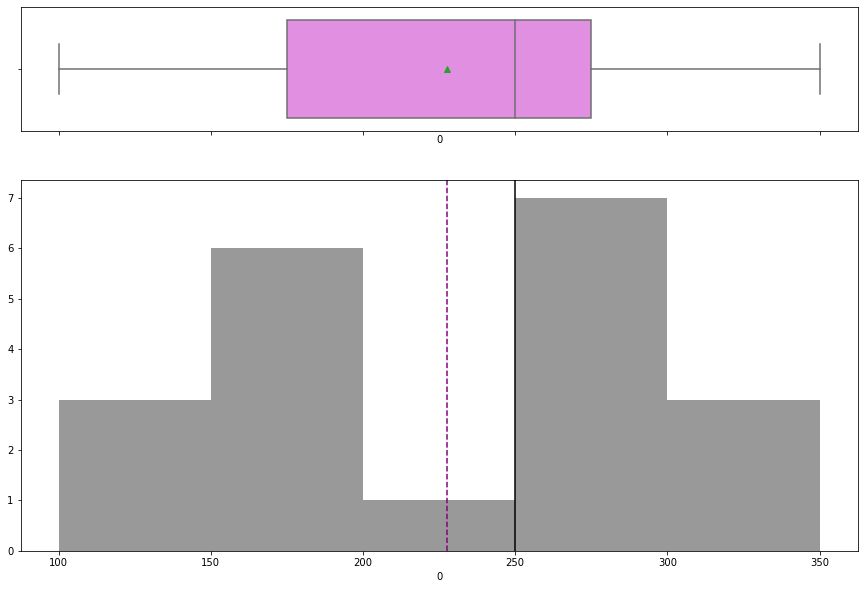

In [8]:
#faking some data
data = [100,125,125,175,175,175,175,175,175,225,275,275,275,275,275,275,275,325,325,350]
room_sqft_df = pd.DataFrame(data)
histogram_boxplot(room_sqft_df[0], bins=5)

In [ ]:
#The characteristic of the shape that is apparent from the histogram, 
#but not the boxplot is the prescence of the two modes.

In [ ]:
#Problem 2 -
#Treatment : The ammount of fungus mixture
#Experimental Unit : Container
#Response Variable : Number of Insects Alive

#The experiment does have a control group if it can be assumed that the mixture 
#which contains zero fungus contains a substance which would have the same 
#effect as not spraying the insects in the first place. 

#The treatments can be randomly assigned by shuffling the numbers 1 to 20
#using a software/TI84 or by drawing 20 numbered tickets from a hat
#or by drawing black cards (clubs as teens) from a shuffled 52-card deck 
#treating aces as ones.
#Each cup's number will be divided by 4 and the remainder of the operation 
#used to identify the cup as 0,1,2, or 3. 0 is treatment 1, 1 treatment 2 
#and so forth.


In [9]:
problem_3_med_prescribed = {"Sex":["Men","Women","Total"],"Never":[.0564,.0636,.12],"Sometimes":[.2016,.1384,.34],"Always":[.2120,.3280,.54],"Total":[.47,.53,1]}
med_taken_as_prescribed_df = pd.DataFrame(problem_3_med_prescribed)
med_taken_as_prescribed_df.head()

,Sex,Never,Sometimes,Always,Total
0,Men,0.0564,0.2016,0.212,0.47
1,Women,0.0636,0.1384,0.328,0.53
2,Total,0.1200,0.3400,0.540,1.00


In [13]:
#never and woman
problem_3_med_prescribed['Never'][1]

0.0636

In [28]:
#Never + Women - NeverAndWomen

In [27]:
med_taken_as_prescribed_df['Never'][2]+med_taken_as_prescribed_df.iloc[1]['Total']-problem_3_med_prescribed['Never'][1]

0.5864

In [30]:
#AandB/B
problem_3_med_prescribed['Never'][1]/med_taken_as_prescribed_df['Total'][1]

0.12

In [31]:
# If they were independent then never&woman would equal Never*Woman
med_taken_as_prescribed_df['Never'][2]*med_taken_as_prescribed_df.iloc[1]['Total']
#Therefore, they are independent

0.0636

In [33]:
# 
from math import comb
p = .54
n = 5
x = 4
comb(n,x)*(p**(x))*((1-p)**(n-x))

0.19557028800000004

In [38]:
#PROBLEM 4 2 prop z
#assumptions:
#indeptendent random samples
#normality
p0 = .197
n0 = 61
p1 = .385
n1 = 52
sig2_0 = p0*(1-p0)*n0
sig2_1 = p1*(1-p1)*n1
print("sigmas 1 and 2:"+str(sig2_0))
print(sig2_1)
T = (n0+n1-2)*(sig2_0 / sig2_1)
print("stat"+str(T))
print("df="+str(n0+n1-2))
#Critical values are alpha.05/2
import scipy.stats

#find Chi-Square critical value
print("crit 1"+str(scipy.stats.chi2.ppf(1-.05, df=n0+n1-2)))
print("crit 2"+str(scipy.stats.chi2.ppf(.05, df=n0+n1-2)))

#86 is outside therefore variances are not equal, we reject the null and cannot pool standard error

sigmas 1 and 2:9.649651
12.3123
stat86.99522112034306
df=111
crit 1136.591071225135
crit 287.68075486394508


In [39]:
sig = (p0*(1-p0)/n0+p1*(1-p1)/n1)**.5
Zstat = (p1-p0)/sig
Zcrit = 1.645
print("stat")
print(Zstat)
print("crit")
print(Zcrit)
#There was an increase in resistance, Zstat>Zcrit reject

stat
2.223854014666162
crit
1.645
